In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sms
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/mumbai-monthly-rains.csv')

In [3]:
data.head()

,Year,Jan,Feb,Mar,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Total
0,1901,13.116602,0.000000,0.000000,3.949669,17.139791,640.714036,888.369692,545.045796,64.271513,9.871696,0.000000,0.000000,2182.478796
1,1902,0.000000,0.000000,0.000000,0.000000,0.355001,247.998782,408.433730,566.595863,688.913455,28.654092,0.488864,19.526547,1960.966334
2,1903,0.000000,0.000000,0.844034,0.000000,220.568740,370.849048,902.447896,602.420828,264.589816,157.892877,0.000000,0.000000,2519.613240
3,1904,0.000000,0.000000,11.381769,0.000000,0.000000,723.081969,390.886799,191.581927,85.704754,38.679948,0.000000,0.000000,1441.317168
4,1905,0.662561,1.713452,0.000000,0.000000,0.000000,123.870892,581.827975,167.382149,172.297723,7.365924,24.903575,0.000000,1080.024250


In [4]:
data.shape

(121, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    121 non-null    int64  
 1   Jan     121 non-null    float64
 2   Feb     121 non-null    float64
 3   Mar     121 non-null    float64
 4   April   121 non-null    float64
 5   May     121 non-null    float64
 6   June    121 non-null    float64
 7   July    121 non-null    float64
 8   Aug     121 non-null    float64
 9   Sept    121 non-null    float64
 10  Oct     121 non-null    float64
 11  Nov     121 non-null    float64
 12  Dec     121 non-null    float64
 13  Total   121 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 13.4 KB


In [6]:
data.isnull().sum()

Year     0
Jan      0
Feb      0
Mar      0
April    0
May      0
June     0
July     0
Aug      0
Sept     0
Oct      0
Nov      0
Dec      0
Total    0
dtype: int64

In [7]:
# Melt the dataframe
df1 = pd.melt(data, id_vars=['Year'], value_vars=['Jan', 'Feb', 'Mar', 'April', 'May', 'June', 'July', 'Aug',
       'Sept', 'Oct', 'Nov', 'Dec'],var_name='Month',  value_name='Rainfall', ignore_index=True)

# Display the first few rows of the melted dataframe
print(df1.head())
df1.head()

   Year Month   Rainfall
0  1901   Jan  13.116602
1  1902   Jan   0.000000
2  1903   Jan   0.000000
3  1904   Jan   0.000000
4  1905   Jan   0.662561


,Year,Month,Rainfall
0,1901,Jan,13.116602
1,1902,Jan,0.000000
2,1903,Jan,0.000000
3,1904,Jan,0.000000
4,1905,Jan,0.662561


In [8]:
df1['Month_new'] = ''
for i in range(len(df1)):
  if df1['Month'][i] == 'Jan':
    df1['Month_new'][i] = 1
  elif df1['Month'][i] == 'Feb':
    df1['Month_new'][i] = 2
  elif df1['Month'][i] == 'Mar':
    df1['Month_new'][i] = 3
  elif df1['Month'][i] == 'April':
    df1['Month_new'][i] = 4
  elif df1['Month'][i] == 'May':
    df1['Month_new'][i] = 5
  elif df1['Month'][i] == 'June':
    df1['Month_new'][i] = 6
  elif df1['Month'][i] == 'July':
    df1['Month_new'][i] = 7
  elif df1['Month'][i] == 'Aug':
    df1['Month_new'][i] = 8
  elif df1['Month'][i] == 'Sept':
    df1['Month_new'][i] = 9
  elif df1['Month'][i] == 'Oct':
    df1['Month_new'][i] = 10
  elif df1['Month'][i] == 'Nov':
    df1['Month_new'][i] = 11
  elif df1['Month'][i] == 'Dec':
    df1['Month_new'][i] = 12

In [9]:
df1['Year'] = df1['Year'].astype(str)
df1['date'] = df1['Year'] + df1['Month']

In [10]:
df1

,Year,Month,Rainfall,Month_new,date
0,1901,Jan,13.116602,1,1901Jan
1,1902,Jan,0.000000,1,1902Jan
2,1903,Jan,0.000000,1,1903Jan
3,1904,Jan,0.000000,1,1904Jan
4,1905,Jan,0.662561,1,1905Jan
...,...,...,...,...,...
1447,2017,Dec,79.685446,12,2017Dec
1448,2018,Dec,0.000000,12,2018Dec
1449,2019,Dec,1.172425,12,2019Dec
1450,2020,Dec,16.787305,12,2020Dec


In [11]:
# Convert 'Year' column to string type
df1['Year'] = df1['Year'].astype(str)

# Create the 'date' column in 'YYYY-MM' format
df1['date'] = df1['Year'] + '-' + df1['Month_new'].astype(str).str.zfill(2) # Pad month with zero if single digit

# Convert 'date' column to datetime objects
df1['date']= pd.to_datetime(df1['date'], format='%Y-%m')

df1 = df1.sort_values(by='date', ascending=True)

In [12]:
df1

,Year,Month,Rainfall,Month_new,date
0,1901,Jan,13.116602,1,1901-01-01
121,1901,Feb,0.000000,2,1901-02-01
242,1901,Mar,0.000000,3,1901-03-01
363,1901,April,3.949669,4,1901-04-01
484,1901,May,17.139791,5,1901-05-01
...,...,...,...,...,...
967,2021,Aug,323.199896,8,2021-08-01
1088,2021,Sept,601.247517,9,2021-09-01
1209,2021,Oct,36.040432,10,2021-10-01
1330,2021,Nov,25.156942,11,2021-11-01


In [13]:
df =df1.drop(['Year','Month','Month_new'], axis=1)

In [14]:
df

,Rainfall,date
0,13.116602,1901-01-01
121,0.000000,1901-02-01
242,0.000000,1901-03-01
363,3.949669,1901-04-01
484,17.139791,1901-05-01
...,...,...
967,323.199896,2021-08-01
1088,601.247517,2021-09-01
1209,36.040432,2021-10-01
1330,25.156942,2021-11-01


In [15]:
df = df.set_index('date')

In [16]:
df

,Rainfall
date,
1901-01-01,13.116602
1901-02-01,0.000000
1901-03-01,0.000000
1901-04-01,3.949669
1901-05-01,17.139791
...,...
2021-08-01,323.199896
2021-09-01,601.247517
2021-10-01,36.040432


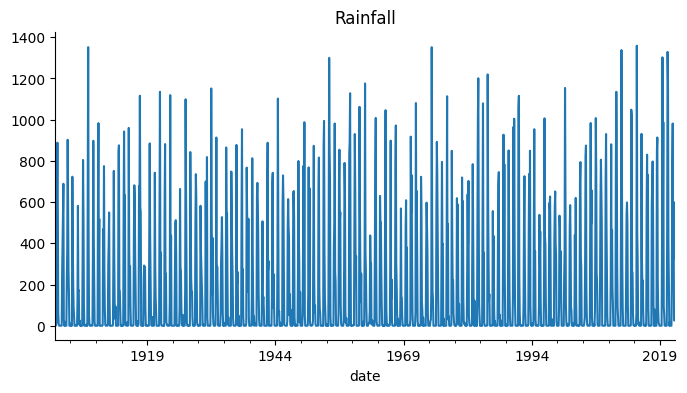

In [19]:
df['Rainfall'].plot(kind='line', figsize=(8, 4), title='Rainfall')
plt.gca().spines[['top', 'right']].set_visible(False)

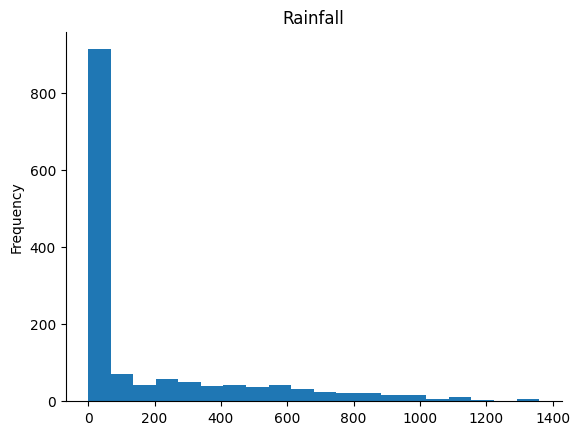

In [20]:
df['Rainfall'].plot(kind='hist', bins=20, title='Rainfall')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [21]:
from statsmodels.tsa.stattools import adfuller

In [22]:
def adf_test(series):
  result = adfuller(series)
  print('ADF Statistics:', result[0])
  print('p-value:',result[1])
  if result[1] <= 0.05:
    print('Data is Stationary')
  else :
    print('Data is not stationary')

In [23]:
adf_test(df['Rainfall'])

ADF Statistics: -5.592175157465863
p-value: 1.3214840668523078e-06
Data is Stationary


In [24]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

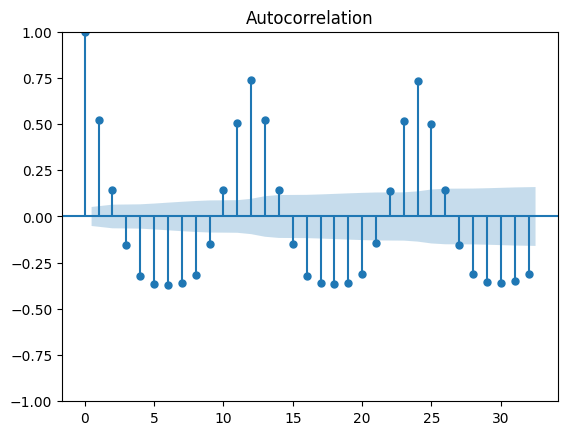

In [25]:
acf = plot_acf(df['Rainfall'].dropna()) # this gives us q

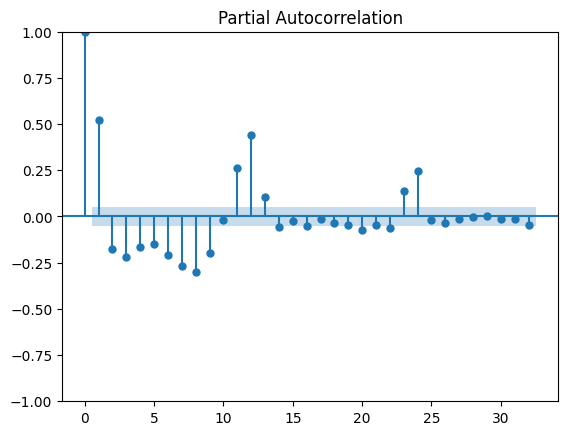

In [26]:
pacf = plot_pacf(df['Rainfall'].dropna()) # this gives us p

In [27]:
from statsmodels.tsa.arima.model import ARIMA

In [28]:
from datetime import datetime,timedelta
train_dataset_end = datetime(1955,12,1)
test_dataset_end = datetime(1960,12,1)

In [29]:
train_data =  df[:train_dataset_end]
test_data = df[train_dataset_end + timedelta(days = 1):test_dataset_end]

In [30]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [31]:
model_arima = sms.tsa.ARIMA(train_data['Rainfall'],order=(3,0,3))

In [32]:
model_1 = model_arima.fit()

In [33]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Rainfall   No. Observations:                  660
Model:                 ARIMA(3, 0, 3)   Log Likelihood               -4419.029
Date:                Wed, 24 Jul 2024   AIC                           8854.058
Time:                        08:03:46   BIC                           8889.996
Sample:                    01-01-1901   HQIC                          8867.987
                         - 12-01-1955                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        169.4052     11.570     14.641      0.000     146.728     192.082
ar.L1          0.7323      0.009     82.366      0.000       0.715       0.750
ar.L2          0.7314      0.015     47.370      0.000       0.701       0.762
ar.L3         -0.9996      0.009   -112.475      0.000      -1.017      -0.982
ma.L1         -0.7355      0.100     -7.363      0.000      -0.931      -0.540
ma.L2         -0.7375      0.124     -5.964      0.000      -0.980      -0.495
ma.L3          0.9980      0.052     19.234      0.000       0.896       1.100
sigma2      4.083e+04      1e-05   4.07e+09      0.000    4.08e+04    4.08e+04
===================================================================================
Ljung-Box (L1) (Q):                  13.44   Jarque-Bera (JB):               287.14
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                             1.15
Prob(H) (two-sided):                  0.80   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.67e+28. Standard errors may be unstable.
"""

In [34]:
pred = model_1.predict(start = pred_start_date,end = pred_end_date)

In [35]:
test_data['Predictions']=pred

<Axes: xlabel='date'>

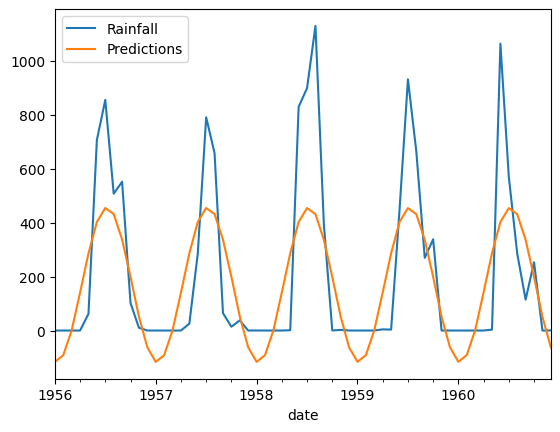

In [36]:
test_data[['Rainfall','Predictions']].plot()

In [37]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [38]:
model_sarimax = SARIMAX(train_data['Rainfall'],order=(3,0,3),seasonal_order=(3,0,3,12))

<Axes: xlabel='date'>

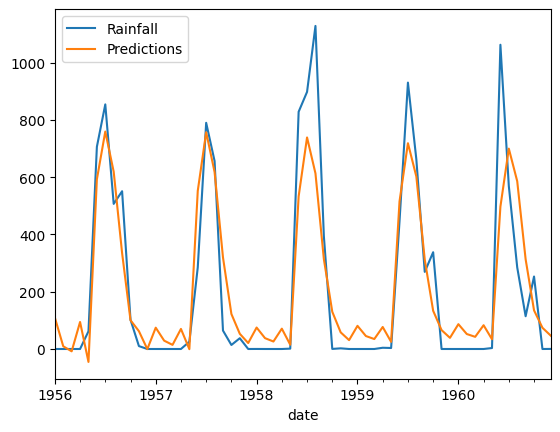

In [39]:
results = model_sarimax.fit()
results.summary()
predmax = results.predict(start = pred_start_date,end = pred_end_date)
test_data['Predictions']=predmax
test_data[['Rainfall','Predictions']].plot()

In [40]:
df_predict = pd.read_csv('/content/test data.csv')

In [41]:
df_predict

,date
0,2022-01-01
1,2022-02-01
2,2022-03-01
3,2022-04-01
4,2022-05-01
5,2022-06-01
6,2022-07-01
7,2022-08-01
8,2022-09-01
9,2022-10-01


In [42]:
df_predict['date']= pd.to_datetime(df_predict['date'], format='%Y-%m-%d') # Changed the format to '%Y-%m-%d' to include the day

In [43]:
df_predict = df_predict.sort_values(by='date', ascending=True)

In [44]:
df_predict

,date
0,2022-01-01
1,2022-02-01
2,2022-03-01
3,2022-04-01
4,2022-05-01
5,2022-06-01
6,2022-07-01
7,2022-08-01
8,2022-09-01
9,2022-10-01


In [45]:
# Convert the 'date' column to datetime and set it as the index
df_predict['date'] = pd.to_datetime(df_predict['date'])
df_predict = df_predict.set_index('date')

train_data =  df_predict[:train_dataset_end]
test_data = df_predict[train_dataset_end + timedelta(days = 1):test_dataset_end]

In [46]:
df_predict

""
date
2022-01-01
2022-02-01
2022-03-01
2022-04-01
2022-05-01
2022-06-01
2022-07-01
2022-08-01
2022-09-01


In [47]:
train_dataset_end = datetime(2022,1,1)
test_dataset_end = datetime(2022,12,1)

In [48]:
train_data =  df[:train_dataset_end]
test_data = df[train_dataset_end + timedelta(days = 1):test_dataset_end]

In [49]:
forecast_start_date = df_predict.index[0]
forecast_end_date = df_predict.index[-1]

In [50]:
forecast_start_date

Timestamp('2022-01-01 00:00:00')

In [51]:
forecast_end_date

Timestamp('2022-12-01 00:00:00')

In [52]:
forecast = model_sarimax.fit()
forecast.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           Rainfall   No. Observations:                  660
Model:             SARIMAX(3, 0, 3)x(3, 0, 3, 12)   Log Likelihood               -4351.633
Date:                            Wed, 24 Jul 2024   AIC                           8729.266
Time:                                    08:05:24   BIC                           8787.665
Sample:                                01-01-1901   HQIC                          8751.902
                                     - 12-01-1955                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5111      0.098     -5.214      0.000      -0.703      -0.319
ar.L2          0.7394      0.063     11.778      0.000       0.616       0.862
ar.L3          0.7680      0.078      9.796      0.000       0.614       0.922
ma.L1          0.6572      0.089      7.382      0.000       0.483       0.832
ma.L2         -0.8039      0.064    -12.575      0.000      -0.929      -0.679
ma.L3         -0.8143      0.074    -11.021      0.000      -0.959      -0.669
ar.S.L12       2.7451      0.297      9.249      0.000       2.163       3.327
ar.S.L24      -2.5908      0.579     -4.474      0.000      -3.726      -1.456
ar.S.L36       0.8434      0.287      2.935      0.003       0.280       1.407
ma.S.L12      -2.4420      0.293     -8.341      0.000      -3.016      -1.868
ma.S.L24       2.0657      0.468      4.412      0.000       1.148       2.983
ma.S.L36      -0.5990      0.178     -3.370      0.001      -0.947      -0.251
sigma2      4.365e+04   2575.134     16.950      0.000    3.86e+04    4.87e+04
===================================================================================
Ljung-Box (L1) (Q):                  17.60   Jarque-Bera (JB):               466.70
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                             0.94
Prob(H) (two-sided):                  0.21   Kurtosis:                         6.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='date'>

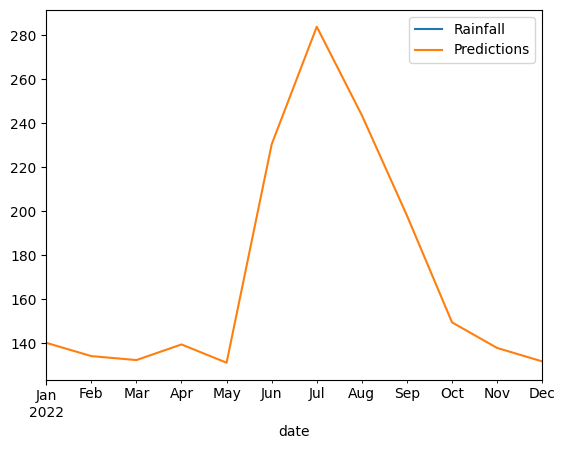

In [53]:
predicting = forecast.predict(start = forecast_start_date,end = forecast_end_date)
test_data['Predictions']=predicting
test_data[['Rainfall','Predictions']].plot()